### Analysis
The rest of this document is dedicated to analysis and data visualization of the collected data.

The two data frames will be merged using the movie ID. The final table will be our dataset for this project.

In [2]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [10]:
%matplotlib inline

In [9]:
print('The Movie Dataset')
print(m_df.head(5))

print('and the Emotion Dataset')
print(e_df.head(5))

The Movie Dataset
   Movie_ID                Title    Budget Original_Language  popularity  \
0       868               Tsotsi   3000000                af    2.504169   
1     17654           District 9  30000000                en   63.136780   
2      1725      West Side Story   6000000                en   23.431117   
3      7347          Elite Squad   4000000                pt   23.604936   
4     12405  Slumdog Millionaire  15000000                en   59.258969   

  release_date    Revenue  Runtime  Rating  Vote_Count  \
0    8/18/2005    9879971     94.0     7.0         137   
1     8/5/2009  210819611    112.0     7.3        5066   
2   10/18/1961   43656822    152.0     7.3         727   
3   10/12/2007          0    115.0     8.0         896   
4    5/12/2008  377910544    120.0     7.7        5195   

                                          Poster_url  
0  https://image.tmdb.org/t/p/original/6ylcfUctX2...  
1  https://image.tmdb.org/t/p/original/axFmCRNQsW...  
2  https://

They both share the `Movie_ID` column, so the merging will be based on that column.

In [10]:
df = pd.merge(m_df, e_df, on='Movie_ID', left_index=True)
df.head(5)

,Movie_ID,Title,Budget,Original_Language,popularity,release_date,Revenue,Runtime,Rating,Vote_Count,Poster_url,Face_score,Face_count
2231,868,Tsotsi,3000000,af,2.504169,8/18/2005,9879971,94.0,7.0,137,https://image.tmdb.org/t/p/original/6ylcfUctX2...,1.0,1
2827,17654,District 9,30000000,en,63.136780,8/5/2009,210819611,112.0,7.3,5066,https://image.tmdb.org/t/p/original/axFmCRNQsW...,NaN,0
2918,1725,West Side Story,6000000,en,23.431117,10/18/1961,43656822,152.0,7.3,727,https://image.tmdb.org/t/p/original/zRQhCSREdR...,NaN,0
1473,7347,Elite Squad,4000000,pt,23.604936,10/12/2007,0,115.0,8.0,896,https://image.tmdb.org/t/p/original/soOOLcNFRH...,1.0,2
631,12405,Slumdog Millionaire,15000000,en,59.258969,5/12/2008,377910544,120.0,7.7,5195,https://image.tmdb.org/t/p/original/gWE4R4DjcU...,3.0,2


We dont need all of the above columns for out analysis. Therefore, `Poster_url`, and `Movie_ID` columns can be removed from the dataframe. 

In [11]:
df = df.drop(["Movie_ID", "Poster_url"], axis=1)
df.head(5)

,Title,Budget,Original_Language,popularity,release_date,Revenue,Runtime,Rating,Vote_Count,Face_score,Face_count
2231,Tsotsi,3000000,af,2.504169,8/18/2005,9879971,94.0,7.0,137,1.0,1
2827,District 9,30000000,en,63.136780,8/5/2009,210819611,112.0,7.3,5066,NaN,0
2918,West Side Story,6000000,en,23.431117,10/18/1961,43656822,152.0,7.3,727,NaN,0
1473,Elite Squad,4000000,pt,23.604936,10/12/2007,0,115.0,8.0,896,1.0,2
631,Slumdog Millionaire,15000000,en,59.258969,5/12/2008,377910544,120.0,7.7,5195,3.0,2


We wuld also need to make sure that `NaN` is defined properly for this dataframe. In addition, we want to make a new binary column that holds presence/absence of a face in the movie poster. 

In [12]:
# To make a binary face 
Face_Presence = map(lambda x: 0 if x == 0 else 1, df.Face_count)
Face_Presence = list(Face_Presence)

And merge that back into the table. 

In [13]:
df['Face_Presence']= Face_Presence

We would also need to make sure that python see's the `NaN` correctly. First we will test if there are NaNs in any column!

In [14]:
# This is the actuall table!
df.head(10)

,Title,Budget,Original_Language,popularity,release_date,Revenue,Runtime,Rating,Vote_Count,Face_score,Face_count,Face_Presence
2231,Tsotsi,3000000,af,2.504169,8/18/2005,9879971,94.0,7.0,137,1.000000,1,1
2827,District 9,30000000,en,63.136780,8/5/2009,210819611,112.0,7.3,5066,NaN,0,0
2918,West Side Story,6000000,en,23.431117,10/18/1961,43656822,152.0,7.3,727,NaN,0,0
1473,Elite Squad,4000000,pt,23.604936,10/12/2007,0,115.0,8.0,896,1.000000,2,1
631,Slumdog Millionaire,15000000,en,59.258969,5/12/2008,377910544,120.0,7.7,5195,3.000000,2,1
3835,City of Ember,55000000,en,23.465539,10/7/2008,17869048,90.0,6.2,895,NaN,0,0
2882,Rampage,0,en,7.101197,8/14/2009,0,85.0,5.9,186,NaN,0,0
2230,Wild Wild West,170000000,en,40.748915,6/29/1999,222104681,106.0,5.2,1646,1.666667,3,1
2690,Christmas Eve,0,en,1.985243,12/4/2015,0,95.0,5.5,37,2.428571,7,1
1070,The Midnight Meat Train,15000000,en,19.913961,8/7/2008,3533227,98.0,6.0,412,3.000000,1,1


In [15]:
# Testing for NaN
df.isnull().head(10)

,Title,Budget,Original_Language,popularity,release_date,Revenue,Runtime,Rating,Vote_Count,Face_score,Face_count,Face_Presence
2231,False,False,False,False,False,False,False,False,False,False,False,False
2827,False,False,False,False,False,False,False,False,False,True,False,False
2918,False,False,False,False,False,False,False,False,False,True,False,False
1473,False,False,False,False,False,False,False,False,False,False,False,False
631,False,False,False,False,False,False,False,False,False,False,False,False
3835,False,False,False,False,False,False,False,False,False,True,False,False
2882,False,False,False,False,False,False,False,False,False,True,False,False
2230,False,False,False,False,False,False,False,False,False,False,False,False
2690,False,False,False,False,False,False,False,False,False,False,False,False
1070,False,False,False,False,False,False,False,False,False,False,False,False


The `Face_score` column has NaNs and is being correctly picked by the above  test. 

Let's visualize some of our data layers. 

In [16]:
# The list of our columns
df.columns

Index(['Title', 'Budget', 'Original_Language', 'popularity', 'release_date',
       'Revenue', 'Runtime', 'Rating', 'Vote_Count', 'Face_score',
       'Face_count', 'Face_Presence'],
      dtype='object')

In [17]:
#Checking out the datatype:
df.dtypes

Title                 object
Budget                 int64
Original_Language     object
popularity           float64
release_date          object
Revenue                int64
Runtime              float64
Rating               float64
Vote_Count             int64
Face_score           float64
Face_count             int64
Face_Presence          int64
dtype: object

Notice that need to change the datatype for release date from Object ot Date!

In [18]:
df.release_date.dtype

dtype('O')

In [98]:
# Changing the datatype to Date
test = pd.to_datetime(df.release_date, format='%m/%d/%Y', errors='ignore')

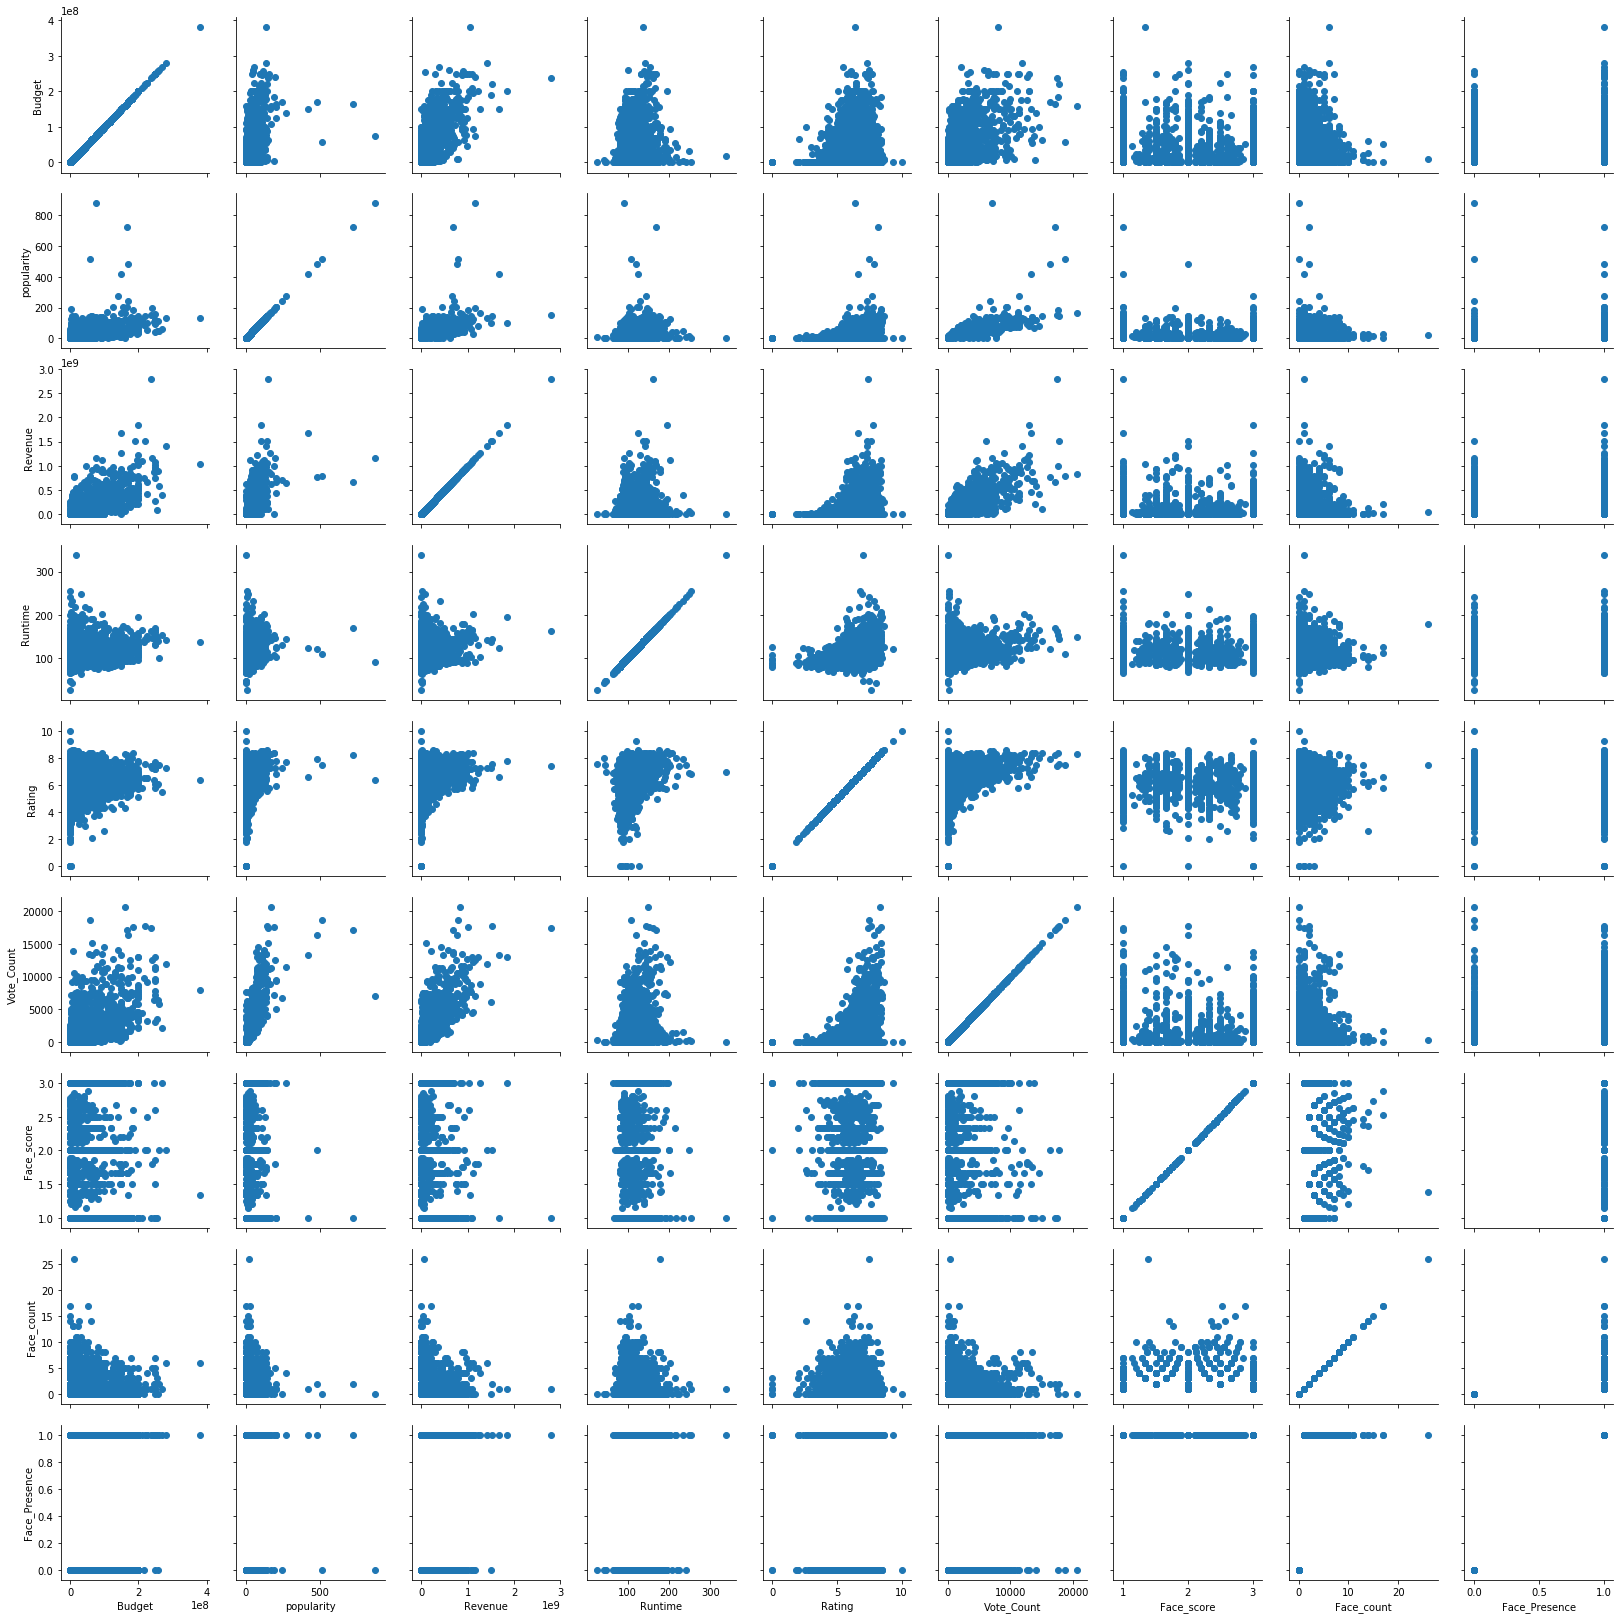

In [105]:
test.dtype
g= sns.PairGrid(data=df)
g = g.map(plt.scatter)

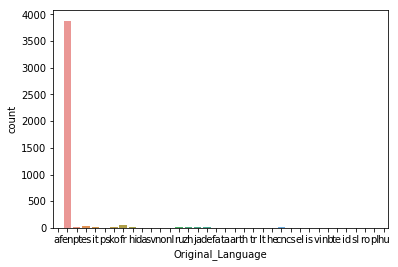

In [88]:
sns.countplot(x='Original_Language', data= df)

In [89]:
pd.value_counts(df.Original_Language == 'en')

True     3880
False     254
Name: Original_Language, dtype: int64

Notice that the majority of movies are in English. 

/home/fyousef/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


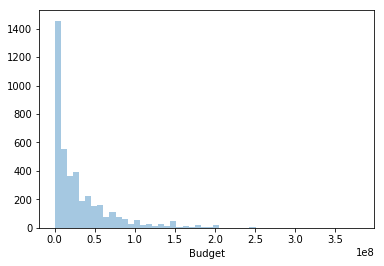

In [93]:
sns.distplot(df.Budget, kde=False)

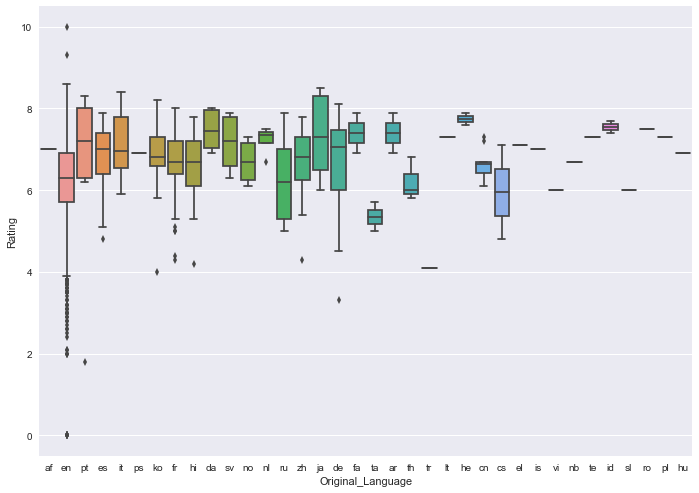

In [23]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.boxplot(x='Original_Language', y='Rating', data= df)


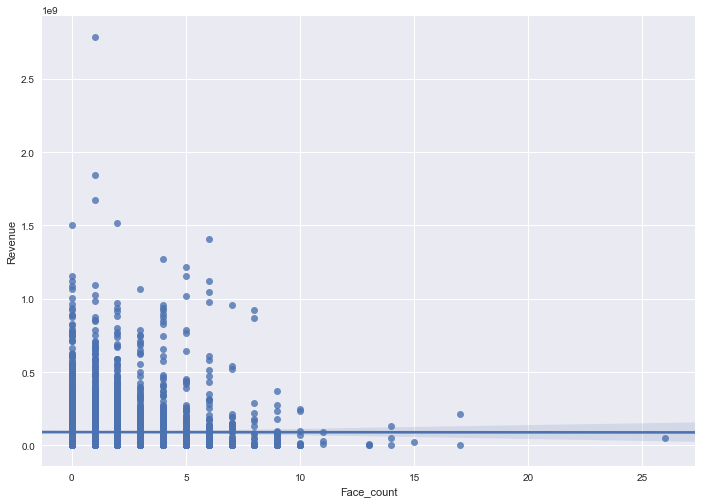

In [38]:
# Log based face_score and rating
fig, ax = plt.subplots()
#ax.set(xscale="log", yscale="log")

sns.regplot(x="Face_count", y='Revenue', data= df, ax=ax)
plt.show()

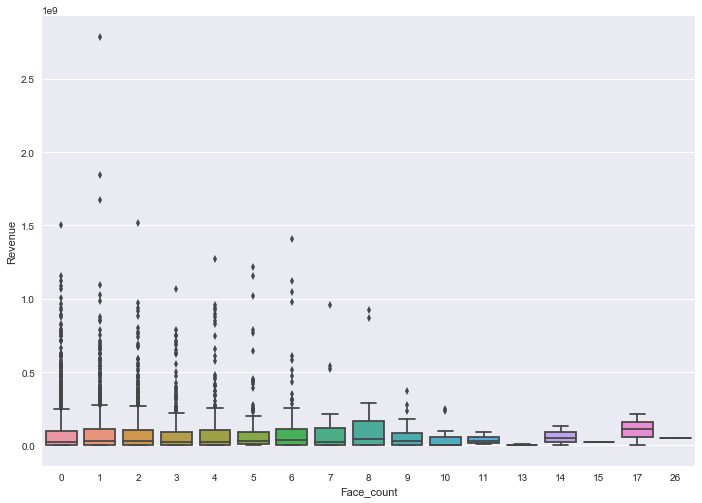

In [39]:
sns.boxplot(x='Face_count', y='Revenue', data=df)

One thing that might be important to notice is that we have a lot of zeros for Revenue. What does this means? Does it mean that those movies never sold a thicket? Probabley not true! 

Let attempt to replace those 0's with `NaN`. 

In [45]:
#Batck up our dataframe
tdf = df

tdf['Revenue']=tdf['Revenue'].replace({0: np.NaN})

#df['Revenue'][df.Revenue==0]== np.nan

In [48]:
tdf.head(10)

,Title,Budget,Original_Language,popularity,release_date,Revenue,Runtime,Rating,Vote_Count,Face_score,Face_count,Face_Presence
2231,Tsotsi,3000000,af,2.504169,8/18/2005,9879971.0,94.0,7.0,137,1.000000,1,1
2827,District 9,30000000,en,63.136780,8/5/2009,210819611.0,112.0,7.3,5066,NaN,0,0
2918,West Side Story,6000000,en,23.431117,10/18/1961,43656822.0,152.0,7.3,727,NaN,0,0
1473,Elite Squad,4000000,pt,23.604936,10/12/2007,NaN,115.0,8.0,896,1.000000,2,1
631,Slumdog Millionaire,15000000,en,59.258969,5/12/2008,377910544.0,120.0,7.7,5195,3.000000,2,1
3835,City of Ember,55000000,en,23.465539,10/7/2008,17869048.0,90.0,6.2,895,NaN,0,0
2882,Rampage,0,en,7.101197,8/14/2009,NaN,85.0,5.9,186,NaN,0,0
2230,Wild Wild West,170000000,en,40.748915,6/29/1999,222104681.0,106.0,5.2,1646,1.666667,3,1
2690,Christmas Eve,0,en,1.985243,12/4/2015,NaN,95.0,5.5,37,2.428571,7,1
1070,The Midnight Meat Train,15000000,en,19.913961,8/7/2008,3533227.0,98.0,6.0,412,3.000000,1,1


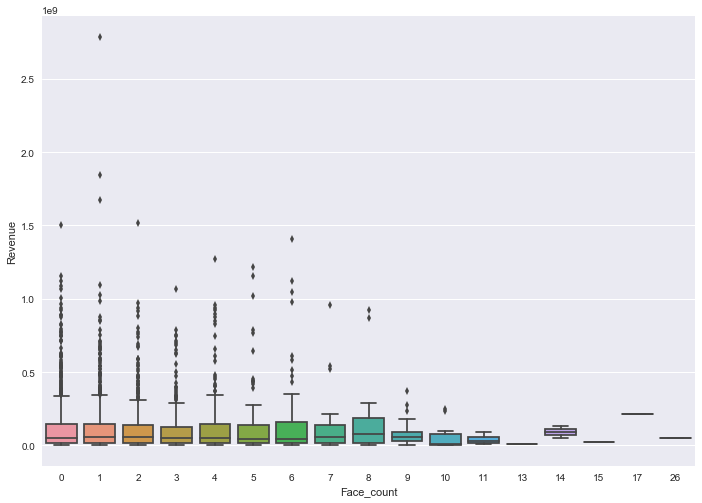

In [49]:
# now plotting it again:
sns.boxplot(x='Face_count', y='Revenue', data=tdf)

Lets do the same thing for Budget

In [54]:
tdf['Budget']=tdf['Budget'].replace({0: np.NaN})

In [55]:
tdf.head(10)

,Title,Budget,Original_Language,popularity,release_date,Revenue,Runtime,Rating,Vote_Count,Face_score,Face_count,Face_Presence
2231,Tsotsi,3000000.0,af,2.504169,8/18/2005,9879971.0,94.0,7.0,137,1.000000,1,1
2827,District 9,30000000.0,en,63.136780,8/5/2009,210819611.0,112.0,7.3,5066,NaN,0,0
2918,West Side Story,6000000.0,en,23.431117,10/18/1961,43656822.0,152.0,7.3,727,NaN,0,0
1473,Elite Squad,4000000.0,pt,23.604936,10/12/2007,NaN,115.0,8.0,896,1.000000,2,1
631,Slumdog Millionaire,15000000.0,en,59.258969,5/12/2008,377910544.0,120.0,7.7,5195,3.000000,2,1
3835,City of Ember,55000000.0,en,23.465539,10/7/2008,17869048.0,90.0,6.2,895,NaN,0,0
2882,Rampage,NaN,en,7.101197,8/14/2009,NaN,85.0,5.9,186,NaN,0,0
2230,Wild Wild West,170000000.0,en,40.748915,6/29/1999,222104681.0,106.0,5.2,1646,1.666667,3,1
2690,Christmas Eve,NaN,en,1.985243,12/4/2015,NaN,95.0,5.5,37,2.428571,7,1
1070,The Midnight Meat Train,15000000.0,en,19.913961,8/7/2008,3533227.0,98.0,6.0,412,3.000000,1,1


In [ ]:
# 

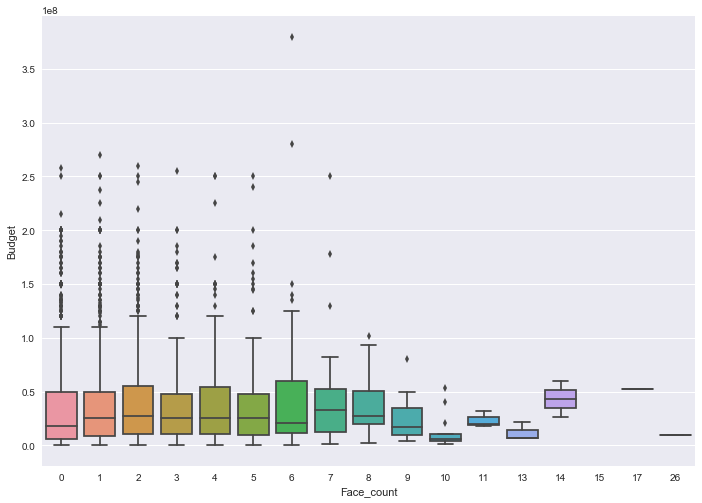

In [56]:
# now plotting it:
sns.boxplot(x='Face_count', y='Budget', data=tdf)

I want to also look at the distribution of ratings accross the posters with or without faces on them. 

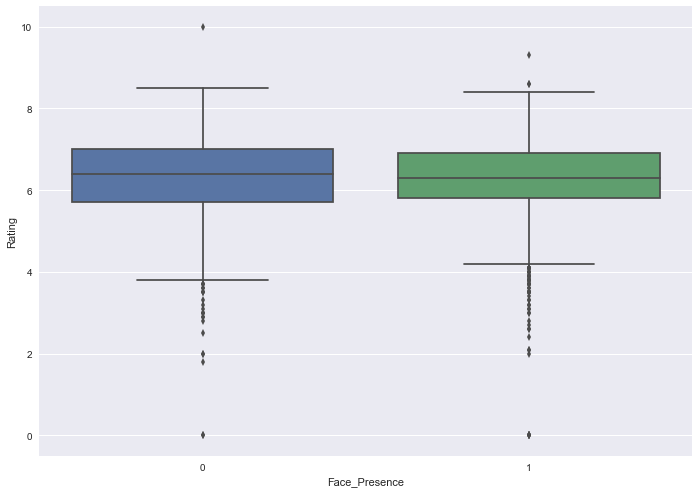

In [57]:
sns.boxplot(x='Face_Presence', y='Rating', data=df)

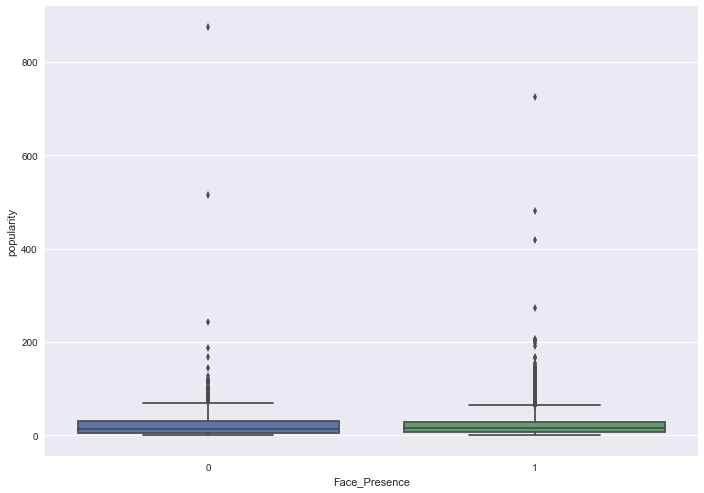

In [58]:
sns.boxplot(x='Face_Presence', y='popularity', data=df)